In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [92]:
df = pd.read_csv("loan_data.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [5]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [49]:
df.dtypes

age            float64
gender        category
education     category
income         float64
experience       int64
ownership     category
amount         float64
intent        category
interest       float64
percentage     float64
history        float64
score            int64
defaults      category
status        category
dtype: object

**comment**: There seems to be a new variables called $loan_percent_income$ that wasn't mentioned in the dataset description. Because we do not know what this variable captures, we will remove it

In [93]:
df = df.drop(columns="loan_percent_income")

In [94]:
df.rename(columns={"person_age": "age", "person_gender": "gender", "person_education": "education", "person_income": "income", "person_emp_exp": "experience", "person_home_ownership": "ownership", "loan_amnt": "amount", "loan_intent": "intent", "loan_int_rate": "interest", "cb_person_cred_hist_length": "history", "credit_score": "score", "previous_loan_defaults_on_file": "defaults", "loan_status": "status"},inplace=True)

In [95]:
df["status"] = df["status"].replace(to_replace=[0.,1.],value=["No","Yes"])

In [96]:
df["gender"] = df["gender"].astype("category")
df["education"] = df["education"].astype("category")
df["ownership"] = df["ownership"].astype("category")
df["intent"] = df["intent"].astype("category")
df["defaults"] = df["defaults"].astype("category")
df["status"] = df["status"].astype("category")

In [10]:
df

,age,gender,education,income,experience,ownership,amount,intent,interest,percentage,history,score,defaults,status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [11]:
df.dtypes

age            float64
gender        category
education     category
income         float64
experience       int64
ownership     category
amount         float64
intent        category
interest       float64
percentage     float64
history        float64
score            int64
defaults      category
status        category
dtype: object

In [12]:
df.describe(include="category")

,gender,education,ownership,intent,defaults,status
count,45000,45000,45000,45000,45000,45000
unique,2,5,4,6,2,2
top,male,Bachelor,RENT,EDUCATION,Yes,0
freq,24841,13399,23443,9153,22858,35000


In [13]:
for x in ["gender","education","ownership","intent","defaults","status"]:
    print(df[x].cat.categories)

Index(['female', 'male'], dtype='object')
Index(['Associate', 'Bachelor', 'Doctorate', 'High School', 'Master'], dtype='object')
Index(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype='object')
Index(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
       'PERSONAL', 'VENTURE'],
      dtype='object')
Index(['No', 'Yes'], dtype='object')
Index([0, 1], dtype='int64')


In [14]:
df.isnull().sum()

age           0
gender        0
education     0
income        0
experience    0
ownership     0
amount        0
intent        0
interest      0
percentage    0
history       0
score         0
defaults      0
status        0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [97]:
df_quali = df[["gender","education","ownership","intent","defaults","status"]]
df_quanti = df.drop(columns=["gender","education","ownership","intent","defaults","status"])

In [17]:
df_quanti.describe()

,age,income,experience,amount,interest,percentage,history,score
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000


# Uni-dimensional analysis

## Qualitative variables

### 1. Barplots

[('DEBT', 'DEBTCONSOLIDATION'), ('EDUCATION', 'EDUCATION'), ('HOME', 'HOMEIMPROVEMENT'), ('MEDICAL', 'MEDICAL'), ('PERSONAL', 'PERSONAL'), ('VENTURE', 'VENTURE')]


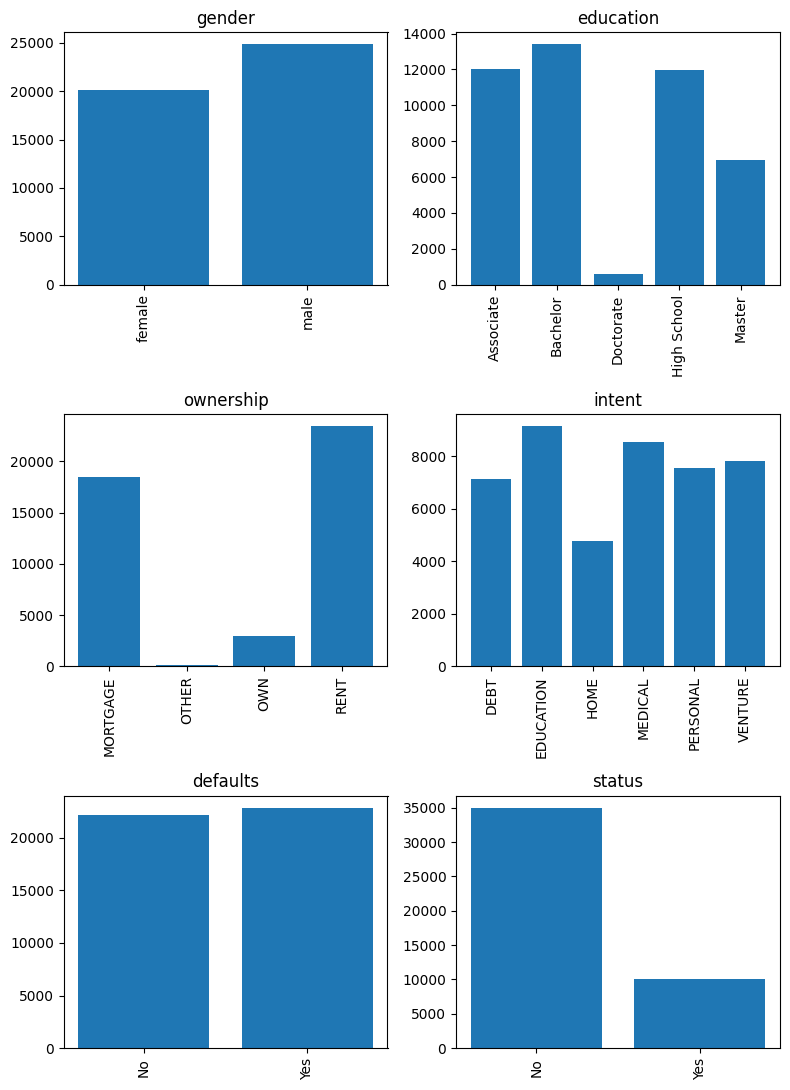

In [70]:
n = np.shape(df_quali)[1]
fig,Ax = plt.subplots(n//2,2,figsize=(8,11))
names = df_quali.columns
intent_names = ["DEBT", "EDUCATION", "HOME", "MEDICAL", "PERSONAL", "VENTURE"] #renamed for plotting
index_names = df_quali["intent"].value_counts().sort_index()
print([(i,j) for i,j in zip(intent_names,index_names.index)])

for i in range(n//2):
    for j in range(2):
        ax = Ax[i,j]
        ax.set_title(names[2*i+j])
        value_counts = df_quali[names[2*i+j]].value_counts().sort_index()
        ax.tick_params(axis='x', rotation=90)
        if names[2*i+j]!="intent":
            ax.bar(value_counts.index,value_counts.values)
            ax.set_xticks(df_quali[names[2*i+j]].cat.categories)
        else:
            ax.bar(intent_names,value_counts.values)
        
plt.tight_layout()
plt.show()

**comment**:

## Quantitative analysis

### 1. Distribution

<Axes: ylabel='Frequency'>

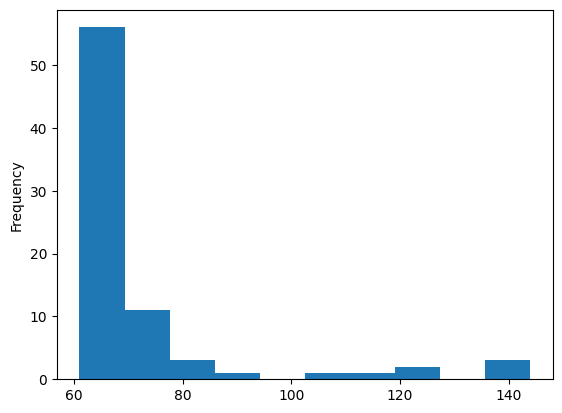

In [200]:
df["age"][df["age"]>60].plot(kind="hist")

**comment**: create a new branch, and delete the individuals with too high age.

<Axes: ylabel='Frequency'>

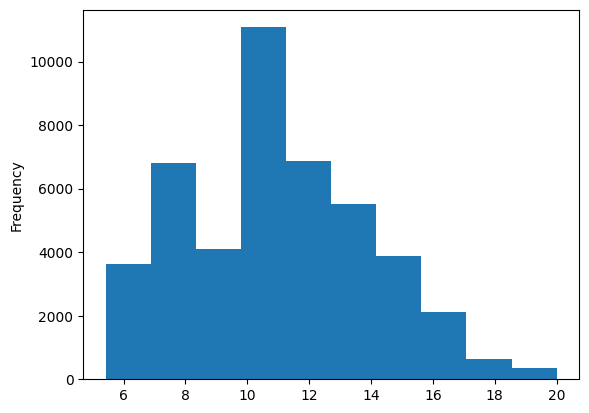

In [109]:
df["interest"].plot(kind="hist")

In [197]:
df_quali.value_counts()

gender  education    ownership  intent             defaults  status
male    Bachelor     MORTGAGE   EDUCATION          Yes       0         388
                     RENT       EDUCATION          Yes       0         386
        High School  RENT       EDUCATION          Yes       0         383
        Bachelor     RENT       MEDICAL            Yes       0         355
        Associate    RENT       EDUCATION          Yes       0         355
                                                                      ... 
female  Doctorate    OWN        EDUCATION          No        1           1
                                DEBTCONSOLIDATION  No        1           1
        Associate    OTHER      HOMEIMPROVEMENT    No        1           1
                                                             0           1
                                EDUCATION          No        1           1
Name: count, Length: 595, dtype: int64

In [196]:
#df_quali["gender"].value_counts().plot(kind="bar",hue="status")
sns.relplot(data=df_quali, x = "gender")

Error in callback <function _draw_all_if_interactive at 0x00000290D7B9D1C0> (for post_execute), with arguments args (),kwargs {}:


ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 500x500 with 1 Axes>

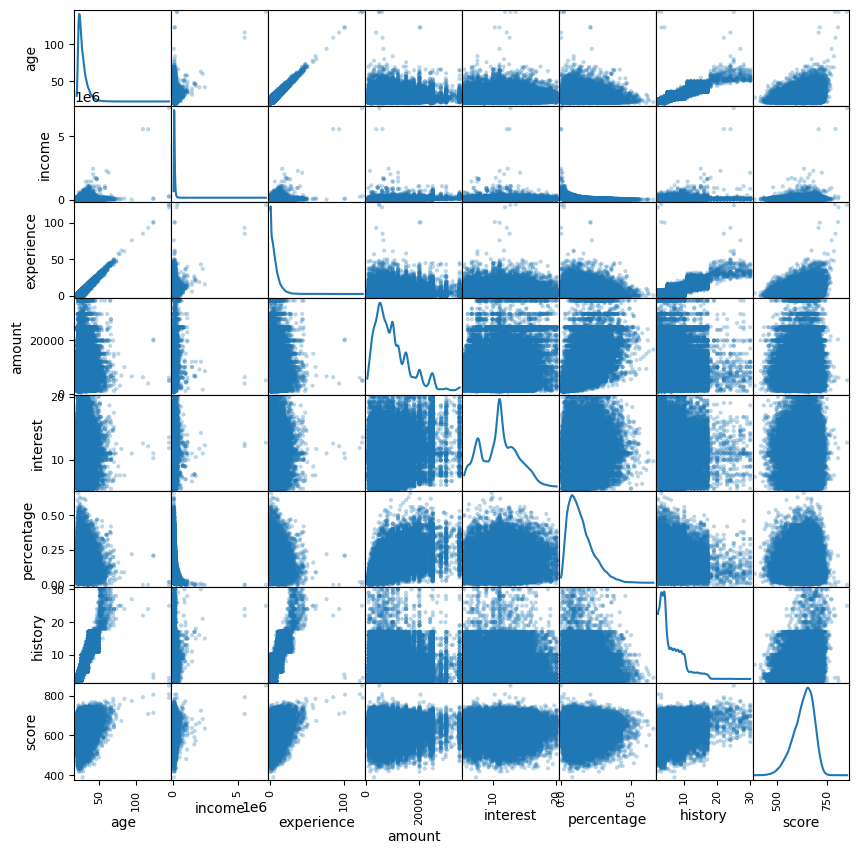

In [112]:
from pandas.plotting import scatter_matrix
#sns.pairplot
sm = scatter_matrix(df_quanti,
                    alpha=0.3,
                    diagonal="kde",
                    figsize=(10,10))
plt.show()

In [98]:
M = (df_quanti["age"]<=100) *(df_quanti["income"]<5e5)
df_quanti_clean = df_quanti[M]
df_quali_clean = df_quali[M]
df_quanti_clean.reset_index(inplace=True,drop=True)

In [77]:
df_quali_clean

,gender,education,ownership,intent,defaults,status
0,female,Master,RENT,PERSONAL,No,Yes
1,female,High School,OWN,EDUCATION,Yes,No
2,female,High School,MORTGAGE,MEDICAL,No,Yes
3,female,Bachelor,RENT,MEDICAL,No,Yes
4,male,Master,RENT,MEDICAL,No,Yes
...,...,...,...,...,...,...
44995,male,Associate,RENT,MEDICAL,No,Yes
44996,female,Associate,RENT,HOMEIMPROVEMENT,No,Yes
44997,male,Associate,RENT,DEBTCONSOLIDATION,No,Yes
44998,male,Bachelor,RENT,EDUCATION,No,Yes


In [170]:
df_quanti_clean["age"] = df_quanti_clean["age"].apply(np.log)
#df_quanti_clean["income"] = df_quanti_clean["income"].apply(np.log)
#df_quanti_clean["history"] = df_quanti_clean["history"].apply(np.log)

C:\Users\vetle\AppData\Local\Temp\ipykernel_8212\2962007765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quanti_clean["age"] = df_quanti_clean["age"].apply(np.log)
C:\Users\vetle\AppData\Local\Temp\ipykernel_8212\2962007765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quanti_clean["income"] = df_quanti_clean["income"].apply(np.log)
C:\Users\vetle\AppData\Local\Temp\ipykernel_8212\2962007765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


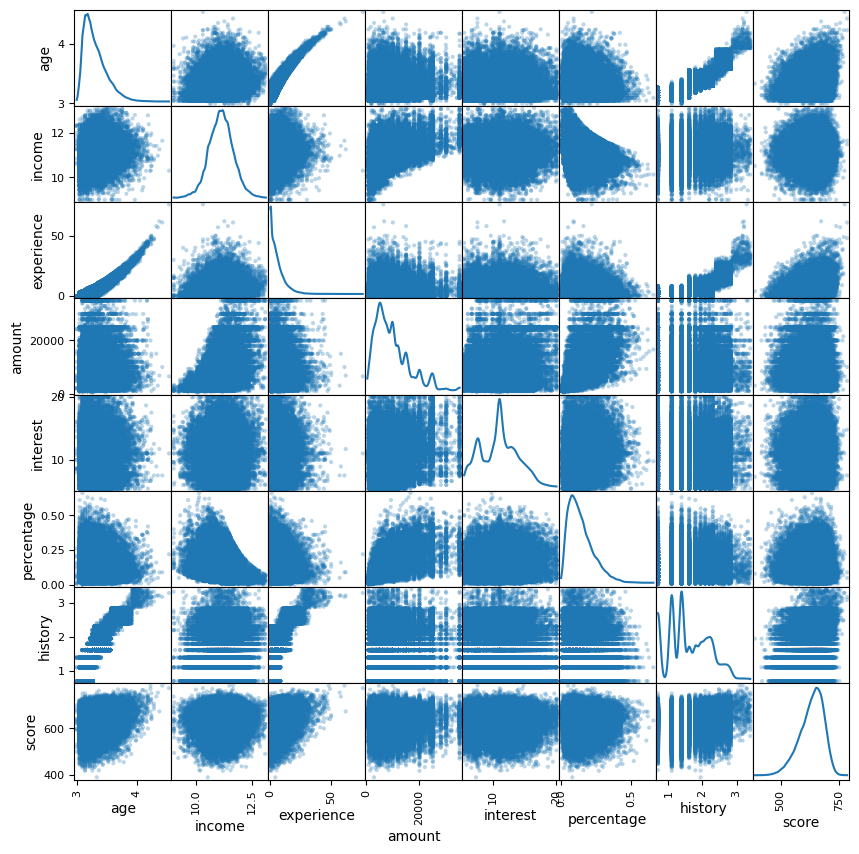

In [171]:
sm = scatter_matrix(df_quanti_clean,
                    alpha=0.3,
                    diagonal="kde",
                    figsize=(10,10))
plt.show()

**comment**: applying log to $age$ works well, but it does not work on $experience$ or on $history$. However. these variables are highly correlated, so we can choose to keep only $age$, in it's logarithmic form

In [172]:
df_quanti_clean.drop(columns=["experience","history"],inplace=True)

C:\Users\vetle\AppData\Local\Temp\ipykernel_8212\173685239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quanti_clean.drop(columns=["experience","history"],inplace=True)


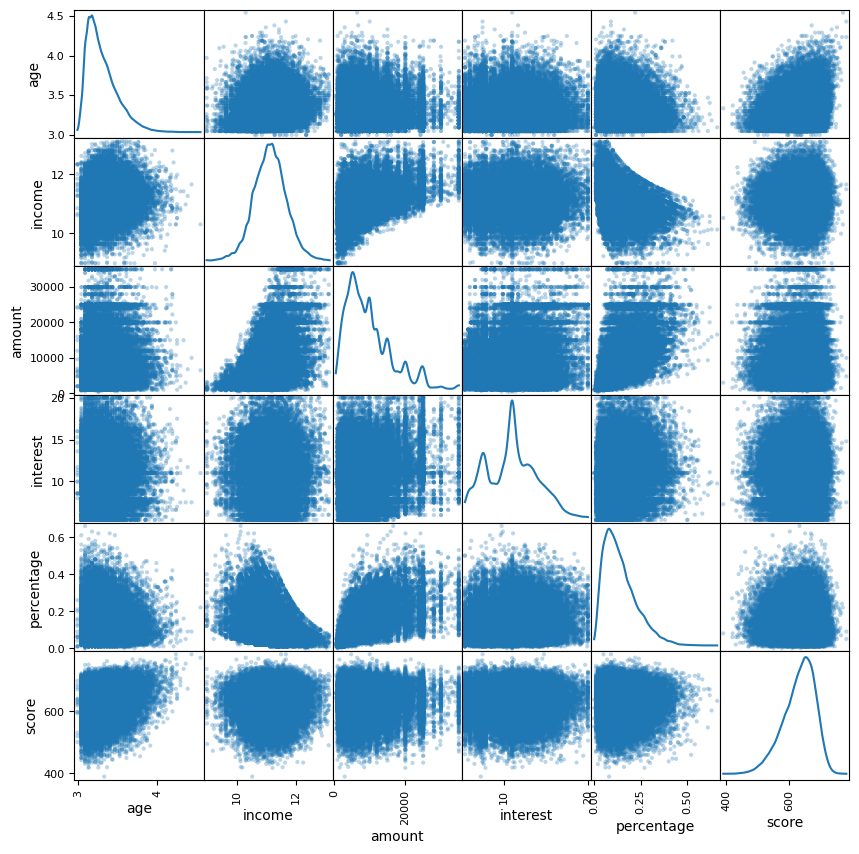

In [173]:
sm = scatter_matrix(df_quanti_clean,
                    alpha=0.3,
                    diagonal="kde",
                    figsize=(10,10))
plt.show()

# Multi-dimensional analysis

## Quanti-Quanti analysis

<Axes: >

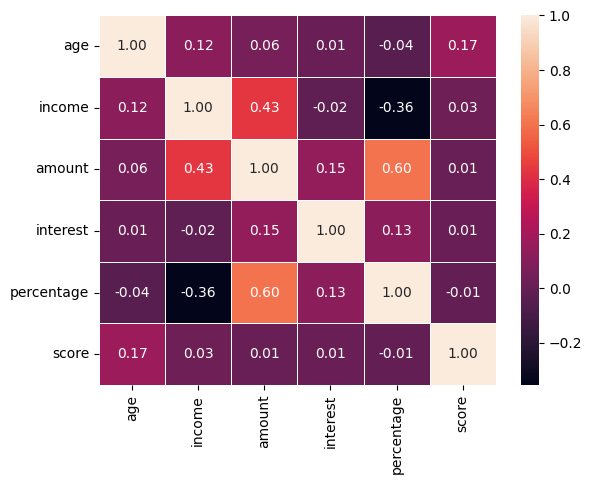

In [174]:
corr_mat = df_quanti_clean.corr()
sns.heatmap(corr_mat,annot=True,fmt=".2f",linewidth=.5)

## Quali-quali analysis

### Gender-Status

gender
male      5504
female    4482
Name: count, dtype: int64
gender
male      19271
female    15635
Name: count, dtype: int64


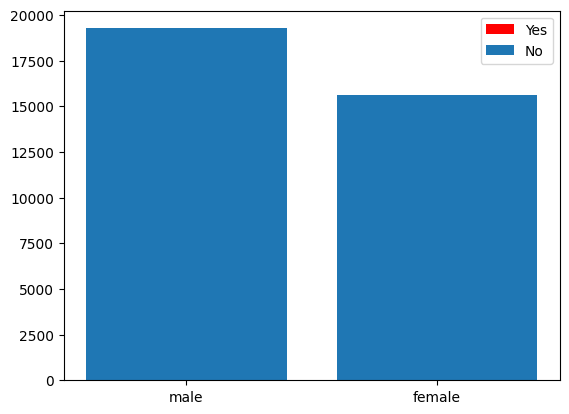

In [101]:
male_status = df_quali_clean["gender"][df_quali_clean["status"]=="Yes"].value_counts()
female_status = df_quali_clean["gender"][df_quali_clean["status"]=="No"].value_counts()
gender_status = pd.DataFrame({

print(male_status)
print(female_status)
fig,ax = plt.subplots(1,1)
ax.bar(male_status.index,male_status.values,color="red",label="Yes")
ax.bar(female_status.index,female_status.values,label="No")
plt.legend()
plt.show()

**comment**: TODO Make this work. Color male-female based on status = yes or no TODO